<a href="https://colab.research.google.com/github/sonuchoudhary6370/cotton-plant-disease-detection/blob/main/cotton_plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [14]:
import json
token = {"username":"soch6370","key":"443e257425f0a301565595753eae6031"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
    

In [15]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-06 09:17:21             82  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44             89  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            209  
nickuzmenkov/ranzcr-clip-kfold-tfrecords                    RANZCR CLiP KFold TFRecords                         2GB  2021-02-21 13:29:51             10  
landrykezebou/lvzhdr-tone-mapping-benchmark-dataset-tmonet  LVZ-HDR Tone Map

In [17]:
!kaggle datasets download -d ananysharma/diseasecotton -p /content

 88% 130M/148M [00:01<00:00, 76.8MB/s]
100% 148M/148M [00:01<00:00, 106MB/s] 


In [18]:
!unzip \*.zip

Archive:  diseasecotton.zip
  inflating: data/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: data/test/diseased cotton leaf/dis_leaf (248).jpg  
  inflating: data/test/diseased cotton leaf/dis_leaf (322).jpg  
  inflating: data/test/diseased cotton plant/dd (328).jpg  
  inflating: data/test/diseased cotton plant/dd (367).jpg  
  inflating: data/test/diseased cotton plant/dd (41).jpg  
  inflating: data/test/diseased cotton plant/dd (513).jpg  
  inflating: data/test/diseased cotton plant/dd (706).jpg  
  inflating: data/test/fresh cotton leaf/d (341).jpg  
  inflating: data/test/fresh cotton leaf/d (366).jpg  
  inflating: data/test/fresh cotton leaf/d (378).jpg  
  inflating: data/test/fresh cotton leaf/d (384).jpg  
  inflating: data/test/fresh cotton leaf/d (396).jpg  
  inflating: data/test/fresh cotton plant/dsd (223).jpg  
  inflating: data/test/fresh cotton plant/dsd (228).jpg  
  inflating: data/test/fresh cotton plant/dsd (405).jpg  
  inflating: data/test/fresh 

In [19]:
#importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
# dataset path
train_path = '/content/data/train'
test_path = '/content/data/test'
val_path='/content/data/val'

In [24]:
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
# excluding the  existing weights of REsNet50
for layer in resnet.layers:
  layer.trainable = False

In [26]:
# getting number of classes
folders = glob('/content/data/train/*')
print(len(folders))

4


In [29]:
#adding flattening layer and output layer
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [30]:
#compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [31]:
# Data Augmentation of training image
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [32]:
# Data Augmentation of test image
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [33]:

train_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [34]:
test_set = test_datagen.flow_from_directory('/content/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [36]:
r=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
61/61 [==============================] - 72s 614ms/step - loss: 9.3732 - accuracy: 0.5936 - val_loss: 1.8796 - val_accuracy: 0.8642
Epoch 2/15
61/61 [==============================] - 36s 592ms/step - loss: 2.0754 - accuracy: 0.8549 - val_loss: 2.1682 - val_accuracy: 0.8364
Epoch 3/15
61/61 [==============================] - 36s 590ms/step - loss: 2.1680 - accuracy: 0.8727 - val_loss: 1.4832 - val_accuracy: 0.9136
Epoch 4/15
61/61 [==============================] - 36s 591ms/step - loss: 1.6775 - accuracy: 0.8917 - val_loss: 1.1025 - val_accuracy: 0.9198
Epoch 5/15
61/61 [==============================] - 36s 590ms/step - loss: 1.6588 - accuracy: 0.9125 - val_loss: 1.7634 - val_accuracy: 0.9012
Epoch 6/15
61/61 [==============================] - 36s 589ms/step - loss: 1.6031 - accuracy: 0.9112 - val_loss: 2.2314 - val_accuracy: 0.8951
Epoch 7/15
61/61 [==============================] - 36s 589ms/step - loss: 2.4795 - accuracy: 0.8918 - val_loss: 1.6928 - val_accuracy: 0.9259

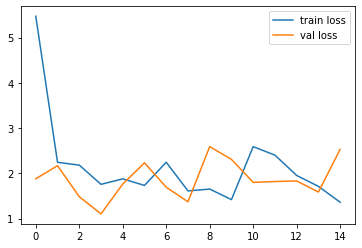

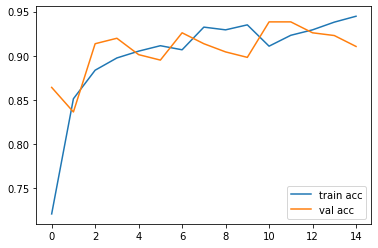

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
#saving the model in h5 format
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [39]:
#for single image test
img=image.load_img('/content/data/train/diseased cotton plant/dd (1)_iaip.jpg',target_size=(224,224))

In [40]:
x=image.img_to_array(img)
x

array([[[123., 191.,  78.],
        [134., 202.,  89.],
        [134., 202.,  89.],
        ...,
        [ 83.,  75.,  56.],
        [107.,  99.,  80.],
        [ 85.,  77.,  58.]],

       [[122., 190.,  77.],
        [124., 192.,  79.],
        [127., 195.,  82.],
        ...,
        [ 98.,  90.,  71.],
        [105.,  97.,  78.],
        [103.,  95.,  76.]],

       [[126., 194.,  81.],
        [124., 192.,  79.],
        [128., 196.,  83.],
        ...,
        [ 94.,  86.,  67.],
        [ 90.,  82.,  63.],
        [ 91.,  83.,  64.]],

       ...,

       [[128., 112.,  79.],
        [148., 132.,  99.],
        [120., 104.,  71.],
        ...,
        [ 84., 146.,  45.],
        [ 67., 129.,  28.],
        [ 83., 145.,  48.]],

       [[122., 106.,  73.],
        [142., 126.,  93.],
        [136., 120.,  87.],
        ...,
        [ 84., 147.,  43.],
        [ 82., 144.,  43.],
        [ 69., 131.,  32.]],

       [[100.,  84.,  51.],
        [158., 142., 109.],
        [129., 1

In [41]:
x=x/255
x=np.expand_dims(x,axis=0)
result=model.predict(x)
result

array([[6.7074604e-09, 2.4070722e-21, 3.0204765e-09, 1.0000000e+00]],
      dtype=float32)

In [42]:
a=np.argmax(model.predict(x),axis=1)
a

array([3])